In [1]:
rainfall <- scan('Cung cap du lieu buoi 7/rain_fall.txt')

In [2]:
rainfall

[1]   0.7  16.1  68.6 170.4 106.1 221.7 357.3 314.7 237.3 119.4  36.5  11.8
[13]  25.6  12.5  59.4  21.6  74.2 241.1  96.8 354.2 345.4  99.7 158.0  31.5
[25]  96.9   4.2  24.7 104.5 249.0  95.1 280.4 534.5 178.5  45.0   9.3   9.0
[37]  70.9  12.3 112.4  19.1 105.4 212.9 449.1 283.2 266.9 259.7  19.4  47.5
[49]  16.6  10.0  34.0  58.8 209.0 188.5 428.1 313.4 229.7  94.4  28.2  84.2

In [3]:
ts.rainfall = ts(rainfall, frequency = 12, start = c(2014,1))

In [4]:
ts.rainfall

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,0.7,16.1,68.6,170.4,106.1,221.7,357.3,314.7,237.3,119.4,36.5,11.8
2015,25.6,12.5,59.4,21.6,74.2,241.1,96.8,354.2,345.4,99.7,158.0,31.5
2016,96.9,4.2,24.7,104.5,249.0,95.1,280.4,534.5,178.5,45.0,9.3,9.0
2017,70.9,12.3,112.4,19.1,105.4,212.9,449.1,283.2,266.9,259.7,19.4,47.5
2018,16.6,10.0,34.0,58.8,209.0,188.5,428.1,313.4,229.7,94.4,28.2,84.2


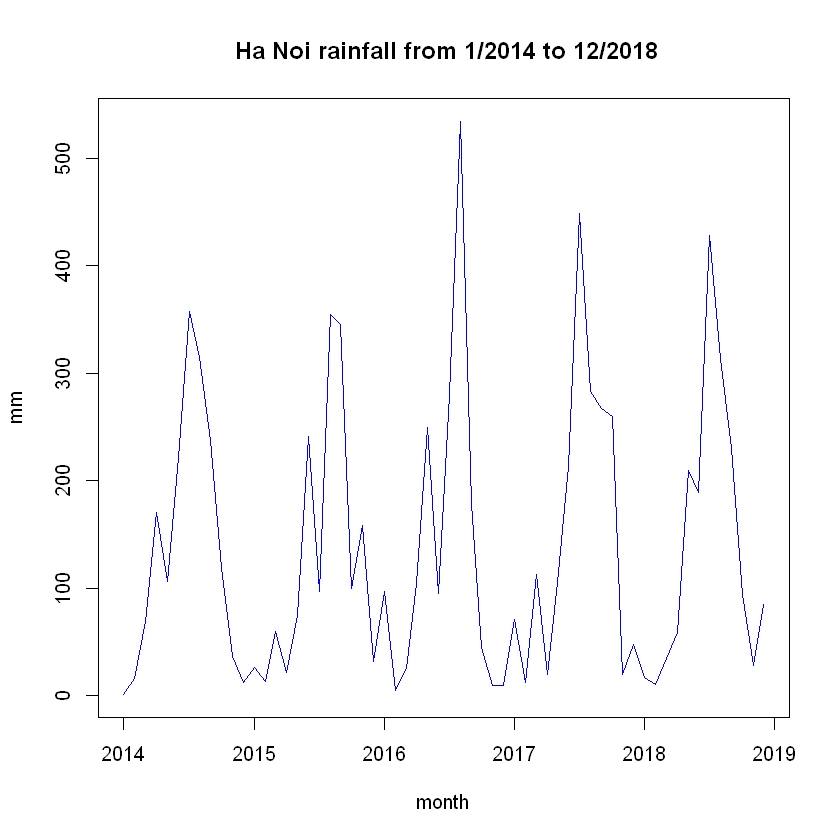

In [5]:
plot.ts(ts.rainfall, main=" Ha Noi rainfall from 1/2014 to 12/2018", ylab='mm', xlab="month", col="blue")

#### Nhan xet
##### Biểu đồ mang tính theo mùa: lượng mưa cao vào mùa hè và thấp vào mùa đông

In [19]:
# SES
forecast.rainfall <- HoltWinters(ts.rainfall, beta=F, gamma=F)

In [20]:
# forecast$fitted

In [21]:
forecast.rainfall

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = ts.rainfall, beta = F, gamma = F)

Smoothing parameters:
 alpha: 0.8286106
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 77.31102

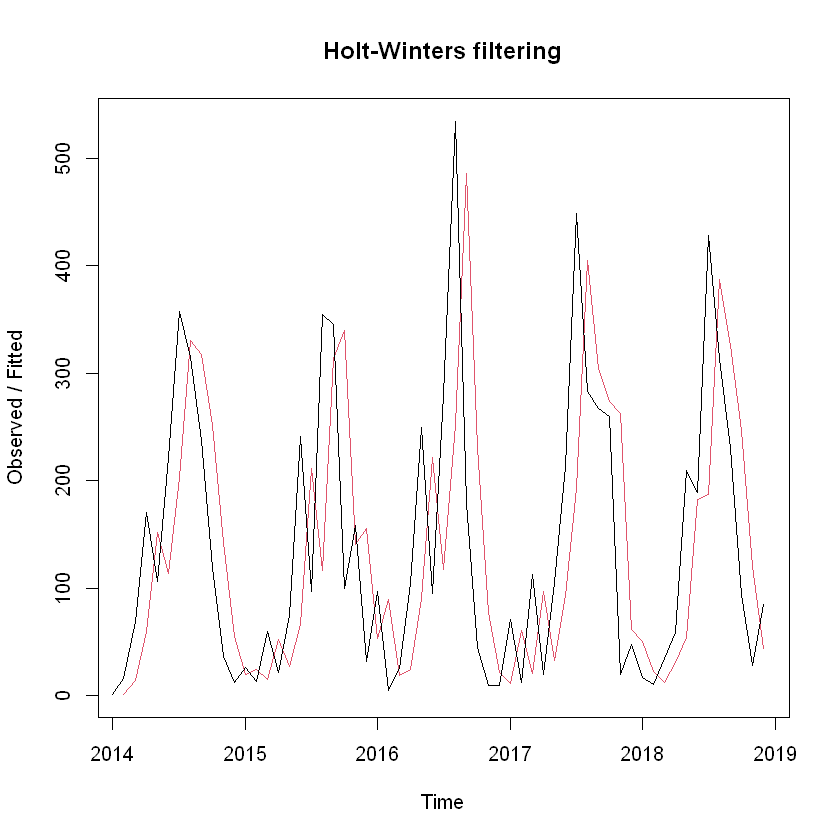

In [22]:
plot(forecast.rainfall)

In [23]:
#Tinh tong binh phuong sai so SSE
forecast.rainfall$SSE

[1] 881132.7

In [35]:
library("forecast")

In [36]:
forecast.rainfall.new = forecast(forecast.rainfall, h=5)

In [37]:
forecast.rainfall.new

         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 2019       77.31102  -80.6344 235.2564 -164.2457 318.8677
Feb 2019       77.31102 -127.8111 282.4331 -236.3962 391.0182
Mar 2019       77.31102 -166.0065 320.6285 -294.8110 449.4331
Apr 2019       77.31102 -198.9710 353.5930 -345.2259 499.8479
May 2019       77.31102 -228.4014 383.0234 -390.2358 544.8578

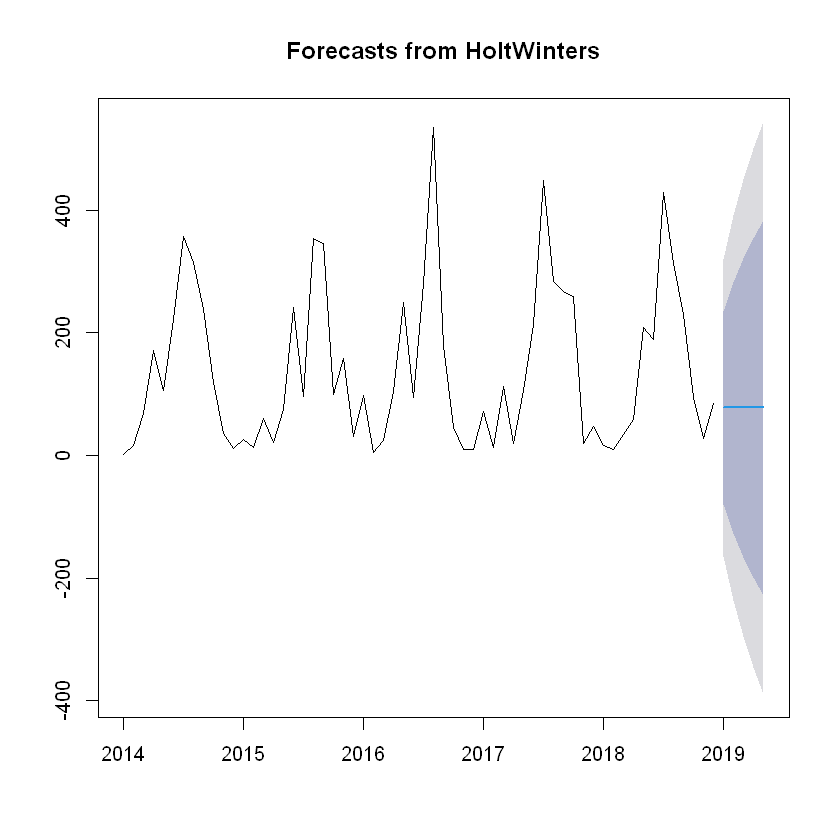

In [38]:
plot(forecast.rainfall.new)

### Nhận xét
####  Biểu đồ vẽ phần dự đoán màu xanh, khoảng tin cậy 80 dến 95% là vùng màu xám
### Với kq trên SES không phải là phương pháp thích hợp

In [39]:
# Holt Exponential Smoothing (HES)
HES.forecast = HoltWinters(log(ts.rainfall), gamma=F)

In [40]:
HES.forecast

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = log(ts.rainfall), gamma = F)

Smoothing parameters:
 alpha: 0.6848052
 beta : 0.6830466
 gamma: FALSE

Coefficients:
        [,1]
a  3.8463113
b -0.1694587

#### Nhận xét:
##### Alpha(~0.685) khá cao: Cho thấy gtri hiện tại có trọng số khá cao trong việc dự đoán gtr tương lai
#### Beta(~0.68) khá cao: Cho ta thấy độ dốc của trend đc cập nhật trong tgian qua

In [41]:
# tong binh phuong sai so SSE
HES.forecast$SSE

[1] 108.5843

In [45]:
sqrt((HES.forecast$SSE)/60)

[1] 1.345265

In [46]:
10*(sqrt((HES.forecast$SSE)/60))

[1] 13.45265

In [47]:
HES.forecast.new = forecast(HES.forecast,h=5)

In [48]:
HES.forecast.new

         Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
Jan 2019       3.676853  1.9150629  5.438642  0.9824277  6.371277
Feb 2019       3.507394  0.8190666  6.195721 -0.6040479  7.618836
Mar 2019       3.337935 -0.5833061  7.259176 -2.6590857  9.334956
Apr 2019       3.168476 -2.2082529  8.545206 -5.0545215 11.391474
May 2019       2.999018 -4.0141548 10.012190 -7.7267041 13.724739

In [49]:
# Nhan xet

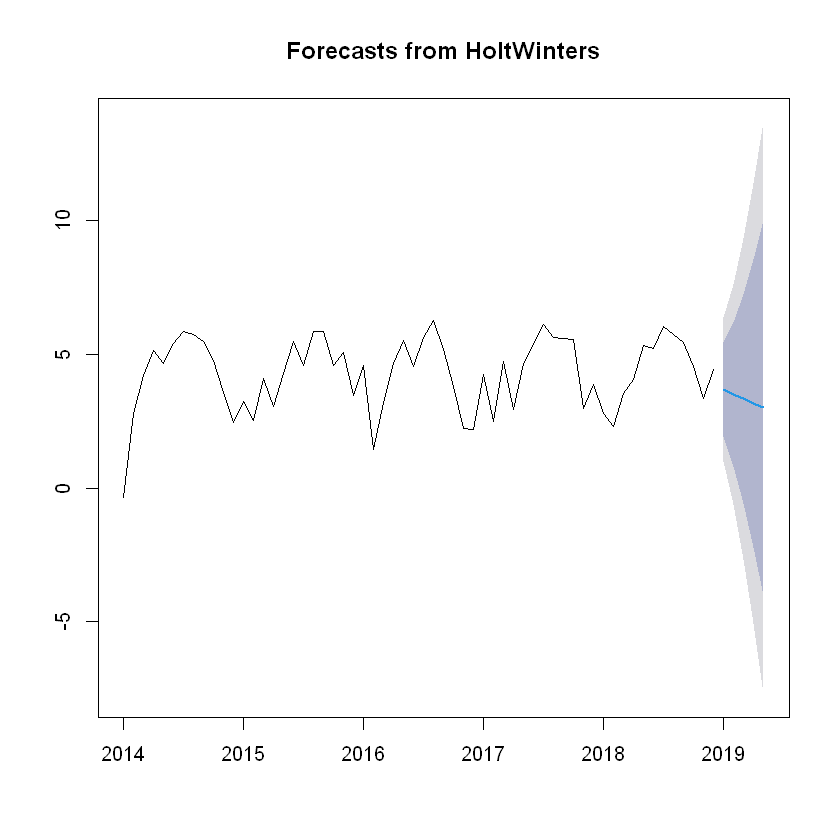

In [50]:
plot(HES.forecast.new)

In [51]:
# Nhan xet

In [53]:
# Chuyen ve gtri ban dau
y = data.frame(HES.forecast.new)


In [54]:
y$Forecast = exp(y$Point.Forecast)

In [56]:
y$Forecast

[1] 39.52181 33.36121 28.16092 23.77124 20.06582

In [57]:
# Holt-Winters ES
HWES.forecast = HoltWinters(log(ts.rainfall))

In [58]:
HWES.forecast

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log(ts.rainfall))

Smoothing parameters:
 alpha: 0.008543883
 beta : 1
 gamma: 0.09435026

Coefficients:
           [,1]
a    4.47766468
b    0.02414736
s1  -0.77223112
s2  -1.71165645
s3  -0.12523136
s4  -0.87068073
s5   0.34080168
s6   1.12211650
s7   1.54813501
s8   1.43928012
s9   1.13742642
s10  0.45545767
s11 -0.70032052
s12 -1.39168999

In [59]:
#Nhan xet

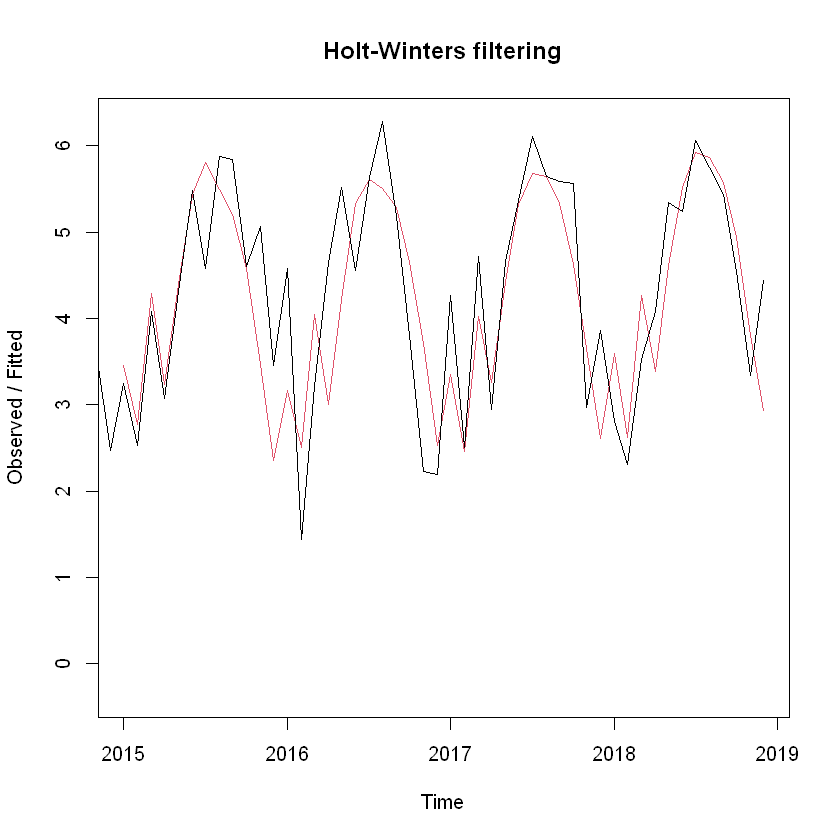

In [60]:
plot(HWES.forecast)    

In [64]:
# Tong binh phuong sai so
HWES.forecast$SSE

[1] 28.13103

In [67]:
# So sau khi bo log
exp(sqrt((HWES.forecast$SSE)/60))

[1] 1.983229

In [61]:
HWES.forecast.new = forecast(HWES.forecast, h=5)

In [62]:
HWES.forecast.new

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2019       3.729581 2.747478 4.711684 2.227584 5.231578
Feb 2019       2.814303 1.832057 3.796549 1.312087 4.316519
Mar 2019       4.424875 3.442306 5.407444 2.922166 5.927585
Apr 2019       3.703573 2.720431 4.686715 2.199987 5.207159
May 2019       4.939203 3.955166 5.923240 3.434249 6.444158

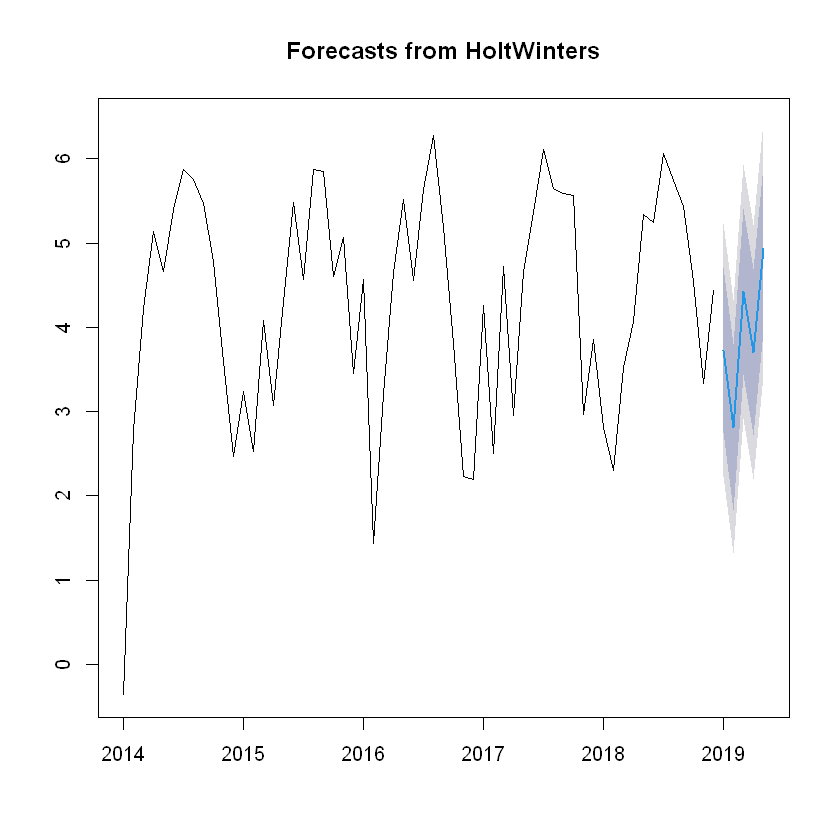

In [63]:
plot(HWES.forecast.new)